                                           STA130 Homework 03

#### Homework GPT Links: 

- Problems 1-3: https://chatgpt.com/share/66ef918b-a970-800e-b9d9-1aaf9da4a1b6
- Problem 4: https://chatgpt.com/share/66ef919c-550c-800e-be2a-56a63ecd5135
- Problems 5-8: https://chatgpt.com/share/66f47790-a974-800e-8b7b-bcc1a9490d69 

#### Problem 1: Use fig.add[h/v]line()_ and fig.add[h/v]rect()_ to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

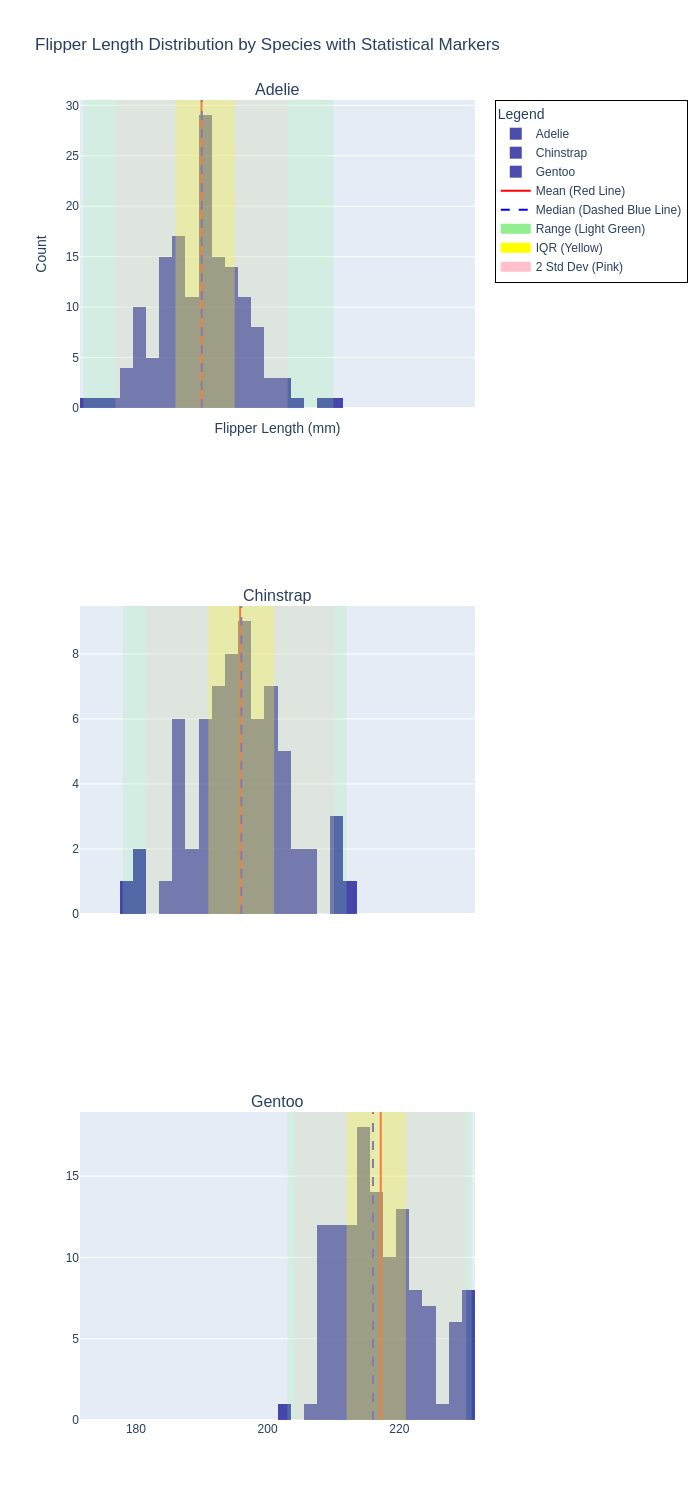

In [8]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing data for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Get unique species
species_list = penguins['species'].unique()

# Create subplots: one for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True,
                    subplot_titles=species_list, vertical_spacing=0.15)

# Function to add vertical lines and rectangles for statistical measures
def add_statistical_lines(fig, species_data, species_name, row):
    flipper_lengths = species_data['flipper_length_mm']
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    std_dev = flipper_lengths.std()

    # Add histogram for the species (dark blue color for better contrast)
    fig.add_trace(go.Histogram(x=flipper_lengths, name=species_name, opacity=0.7, marker=dict(color="darkblue"), 
                               nbinsx=20, legendgroup=species_name), row=row, col=1)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color="red", width=2), row=row, col=1)
    fig.add_vline(x=median, line=dict(color="blue", width=2, dash='dash'), row=row, col=1)

    # Add rectangles for range, IQR, and 2*standard deviation range
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor="lightgreen", opacity=0.2, line_width=0, row=row, col=1)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="yellow", opacity=0.3, line_width=0, row=row, col=1)
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, fillcolor="pink", opacity=0.2, line_width=0, row=row, col=1)

# Loop through each species and add its histogram and statistical markers to the subplots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    add_statistical_lines(fig, species_data, species, row=i+1)

# Create custom legend for location and scale info
legend_items = [
    go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="red", width=2), name="Mean (Red Line)"),
    go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="blue", width=2, dash="dash"), name="Median (Dashed Blue Line)"),
    go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="lightgreen", width=12), name="Range (Light Green)"),
    go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="yellow", width=12), name="IQR (Yellow)"),
    go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="pink", width=12), name="2 Std Dev (Pink)"),
]

# Add these legend items as traces
for item in legend_items:
    fig.add_trace(item)

# Update layout with proper legend positioning
fig.update_layout(
    title="Flipper Length Distribution by Species with Statistical Markers",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    showlegend=True,
    legend=dict(x=1.05, y=1, traceorder='normal', font=dict(size=12), title="Legend", bordercolor="Black", borderwidth=1),
    height=1500,  # Adjust the height based on the number of subplots
    margin=dict(t=100, r=200),  # Add right margin for legend spacing
    font=dict(size=12),  # Adjust overall font size
)

# Show the plot
fig.show(renderer="png")

#### Problem 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

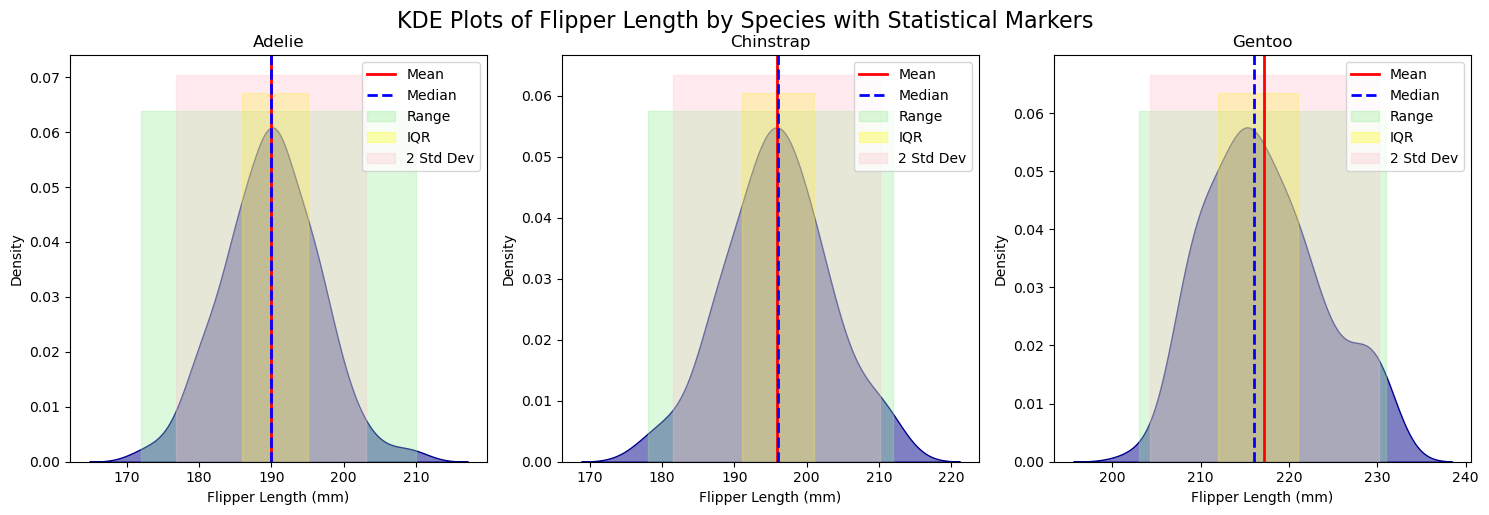

TypeError: Figure.show() got an unexpected keyword argument 'renderer'

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing data for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Get unique species
species_list = penguins['species'].unique()

# Set up the matplotlib figure
num_species = len(species_list)
cols = 3
rows = (num_species // cols) + (num_species % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate through

# Function to add KDE plots and annotations
def add_kde_plot(ax, species_data, species_name):
    flipper_lengths = species_data['flipper_length_mm']
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    std_dev = flipper_lengths.std()

    # Plot KDE
    sns.kdeplot(flipper_lengths, ax=ax, color="darkblue", fill=True, alpha=0.5)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', label='Mean', linewidth=2)
    ax.axvline(median, color='blue', linestyle='--', label='Median', linewidth=2)

    # Add rectangles for range, IQR, and 2*standard deviation range
    ax.fill_betweenx([0, ax.get_ylim()[1]], flipper_min, flipper_max, color='lightgreen', alpha=0.3, label='Range')
    ax.fill_betweenx([0, ax.get_ylim()[1]], q1, q3, color='yellow', alpha=0.3, label='IQR')
    ax.fill_betweenx([0, ax.get_ylim()[1]], mean - 2*std_dev, mean + 2*std_dev, color='pink', alpha=0.3, label='2 Std Dev')

    # Set titles and labels
    ax.set_title(species_name)
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")
    ax.legend()

# Loop through each species and add its KDE plot and statistical markers to the subplots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    add_kde_plot(axes[i], species_data, species)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("KDE Plots of Flipper Length by Species with Statistical Markers", fontsize=16, y=1.02)
plt.show()
fig.show(renderer="png")

#### Problem 3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

I personally prefer using the kernel density estimators (KDE) as it is the most similar to what I am most familiar with (histograms). Although the other two data distribution visualization methods are good, and may even provide more information, I believe that KDE are the most simple way to introduce information to an audience (myself included) without too much confusion or analysis required to explain. This is especially the case for when there are multiple data sets that need to be compared. Instead of having multiple histograms or box plots for each individual item (for example, the species of penguins as shown above), the KDE can help overlap multiple types of information over each other without it becoming too cluttered. 

#### Problem 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

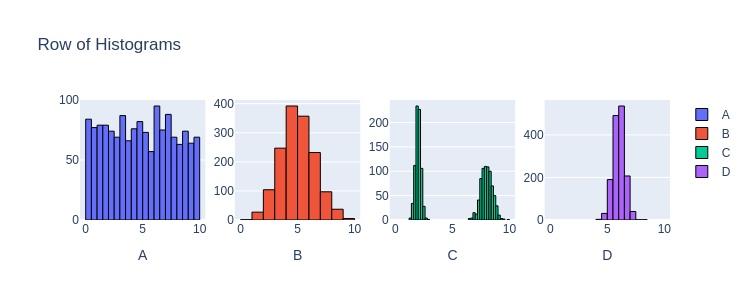

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances

- A: Mean = 4.93, Variance = 8.66
- B: Mean = 4.98, Variance = 2.35
- C: Mean = 5.01, Variance = 9.21
- D: Mean = 5.97, Variance = 0.23

1. A and C have similar means and similar variances 
2. B and C have similar means but quite different variances  
3. None of the data sets have similar variances but quite different means, assuming quite different being a difference >=1. If a quite difference mean can be smaller due to the context of these examples, then A and C have the most similar variances but quite different means.
4. A and D have quite different means and quite different variances

#### 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

In [6]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

The code below shows a Gamma distribution, which are used to measure variables that may be skewed distributions. It generates a right skewed sample by generating 1000 random samples with rvs(size=1000) and stores them into sample1. Then, for sample1, the line sample1 = stats.gamma(a=2, scale=2).rvs(size=1000). The 'a' value is the shape parameter and controls the shape of the distribution. In this case, since a = 2, the distribution is less skewed. This same logic applies to the left skewed sample, except for the left skewed gamma distribution, the sample is multiplied by -1, which is a mirrored version of the right skewed gamma distribution. The mean for the right skewed sample is going to be higher as more of the values lean towards the right side, whereas the opposite is for the left samples. In a left skewed sample, the smaller values in the sample pull the mean towards it and the median stays relatively the same, so the median is larger than the mean. 

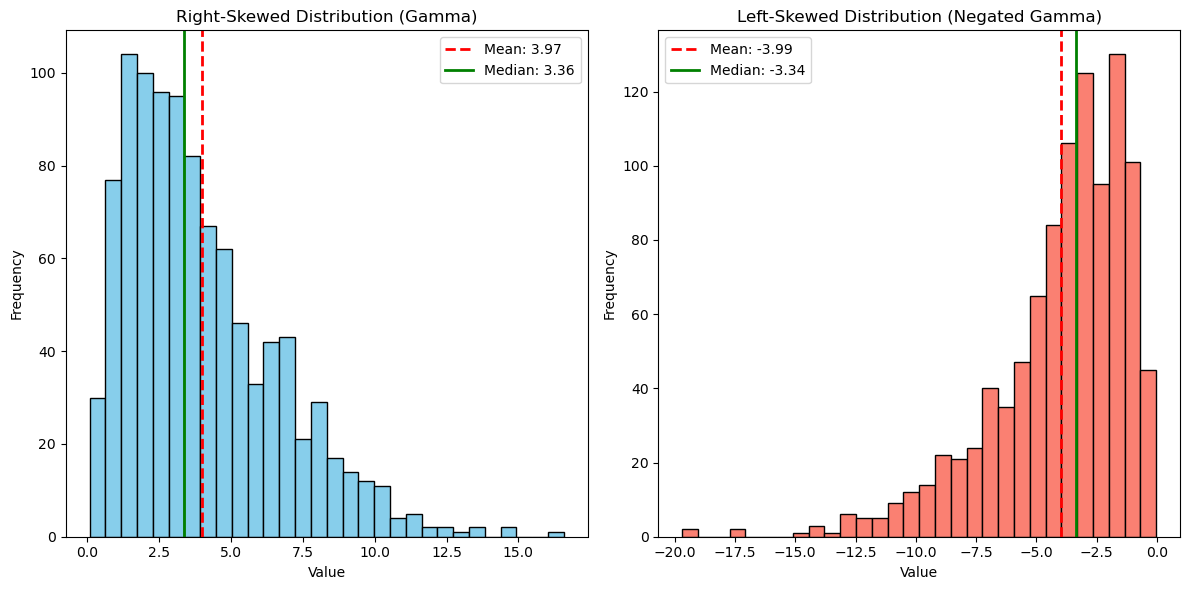

TypeError: Figure.show() got an unexpected keyword argument 'renderer'

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate right-skewed data using the Gamma distribution
right_skewed_data = stats.gamma(a=2, scale=2).rvs(size=1000)

# Generate left-skewed data by negating the Gamma distribution data
left_skewed_data = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Convert the data into pandas DataFrames for easier plotting
right_skewed_df = pd.DataFrame({'Right Skewed Data': right_skewed_data})
left_skewed_df = pd.DataFrame({'Left Skewed Data': left_skewed_data})

# Calculate mean and median for both datasets
right_skewed_mean = right_skewed_df['Right Skewed Data'].mean()
right_skewed_median = right_skewed_df['Right Skewed Data'].median()

left_skewed_mean = left_skewed_df['Left Skewed Data'].mean()
left_skewed_median = left_skewed_df['Left Skewed Data'].median()

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Right-Skewed Distribution
axes[0].hist(right_skewed_df['Right Skewed Data'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Right-Skewed Distribution (Gamma)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Add mean and median lines to the right-skewed plot
axes[0].axvline(right_skewed_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {right_skewed_mean:.2f}')
axes[0].axvline(right_skewed_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {right_skewed_median:.2f}')
axes[0].legend()

# Plot Left-Skewed Distribution
axes[1].hist(left_skewed_df['Left Skewed Data'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Left-Skewed Distribution (Negated Gamma)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Add mean and median lines to the left-skewed plot
axes[1].axvline(left_skewed_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {left_skewed_mean:.2f}')
axes[1].axvline(left_skewed_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {left_skewed_median:.2f}')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()
fig.show(renderer="png")

#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

Alcohol Content Summary Statistics:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Mean Alcohol Content: 10.422983114446529
Median Alcohol Content: 10.2

Wine Quality Summary Statistics:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Mean Quality Score: 5.6360225140712945
Median Quality Score: 6.0



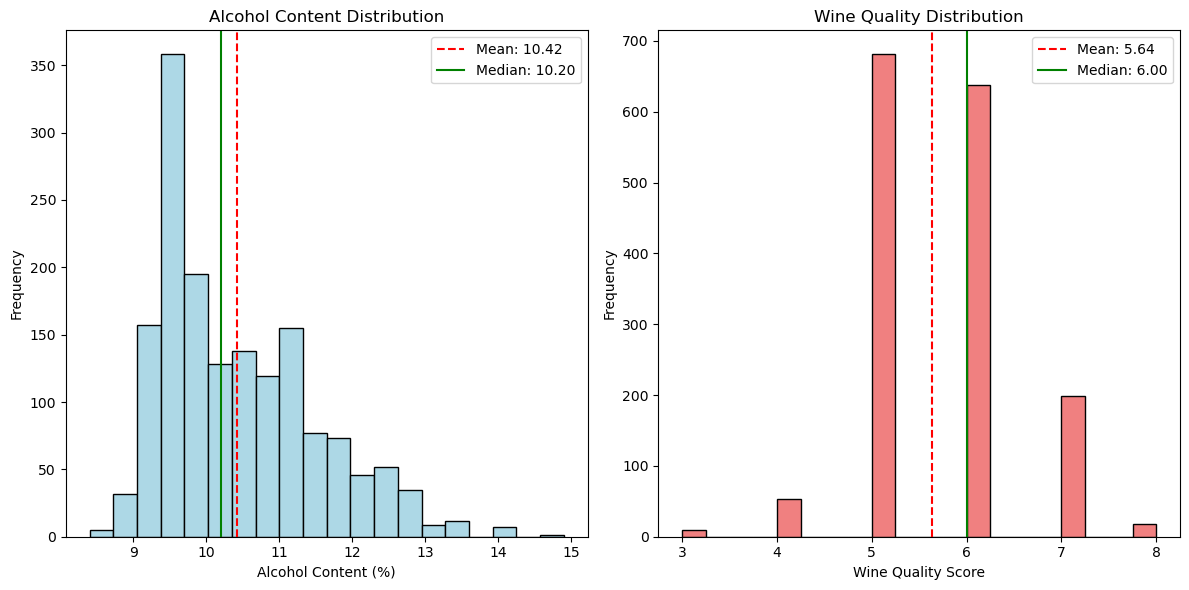

TypeError: Figure.show() got an unexpected keyword argument 'renderer'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset from UCI Machine Learning Repository (Red Wine Quality Data)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Summary statistics for 'alcohol' and 'quality' columns
alcohol_summary = wine_data['alcohol'].describe()
quality_summary = wine_data['quality'].describe()

# Mean and median for 'alcohol' and 'quality'
alcohol_mean = wine_data['alcohol'].mean()
alcohol_median = wine_data['alcohol'].median()

quality_mean = wine_data['quality'].mean()
quality_median = wine_data['quality'].median()

# Print summary statistics
print("Alcohol Content Summary Statistics:")
print(alcohol_summary)
print(f"\nMean Alcohol Content: {alcohol_mean}")
print(f"Median Alcohol Content: {alcohol_median}\n")

print("Wine Quality Summary Statistics:")
print(quality_summary)
print(f"\nMean Quality Score: {quality_mean}")
print(f"Median Quality Score: {quality_median}\n")

# Plotting histograms for 'alcohol' and 'quality'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Alcohol content histogram
axes[0].hist(wine_data['alcohol'], bins=20, color='lightblue', edgecolor='black')
axes[0].axvline(alcohol_mean, color='red', linestyle='--', label=f'Mean: {alcohol_mean:.2f}')
axes[0].axvline(alcohol_median, color='green', linestyle='-', label=f'Median: {alcohol_median:.2f}')
axes[0].set_title('Alcohol Content Distribution')
axes[0].set_xlabel('Alcohol Content (%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Wine quality score histogram
axes[1].hist(wine_data['quality'], bins=20, color='lightcoral', edgecolor='black')
axes[1].axvline(quality_mean, color='red', linestyle='--', label=f'Mean: {quality_mean:.2f}')
axes[1].axvline(quality_median, color='green', linestyle='-', label=f'Median: {quality_median:.2f}')
axes[1].set_title('Wine Quality Distribution')
axes[1].set_xlabel('Wine Quality Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()
fig.show(renderer="png")

#### 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

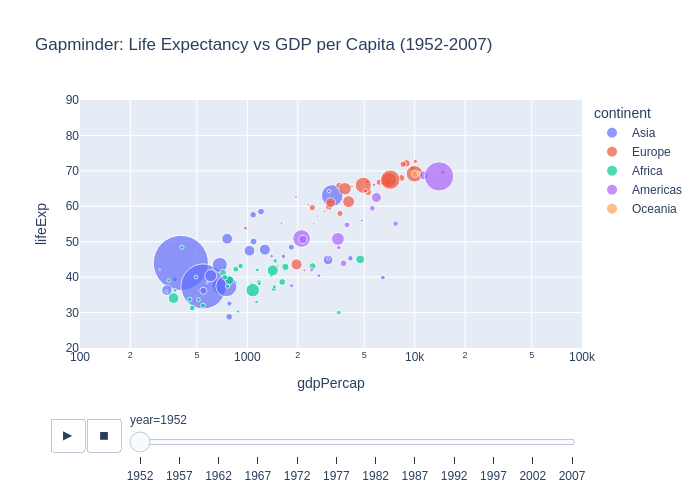

In [30]:
import plotly.express as px

# Load the Gapminder dataset from Plotly Express
gapminder_df = px.data.gapminder()

# Create an animated scatter plot
fig = px.scatter(
    gapminder_df,
    x="gdpPercap",  # X-axis: GDP per capita
    y="lifeExp",    # Y-axis: Life expectancy
    size="pop",     # Size of the bubbles: Population
    color="continent",  # Color by continent
    hover_name="country",  # Hover shows country names
    log_x=True,  # Logarithmic scale for the X-axis
    size_max=60,  # Maximum bubble size
    animation_frame="year",  # Animate over years
    animation_group="country",  # Ensure smooth transitions between countries
    range_x=[100, 100000],  # Set X-axis range
    range_y=[20, 90],  # Set Y-axis range
    title="Gapminder: Life Expectancy vs GDP per Capita (1952-2007)"
)

# Show the animated plot
fig.show(renderer="png")

#### 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

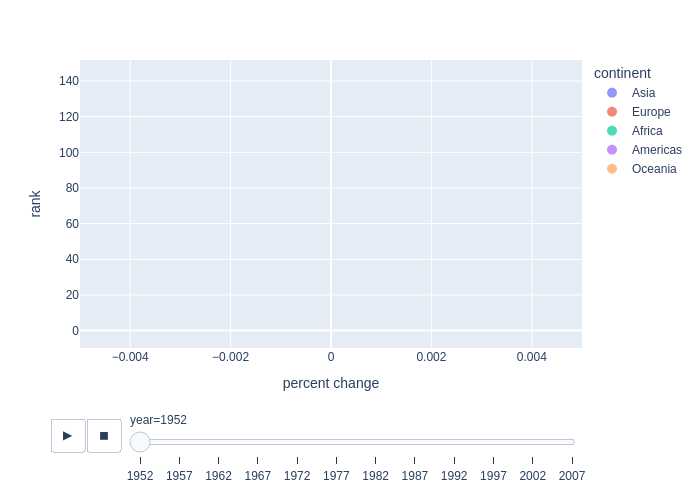

In [9]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset from Plotly Express
df = px.data.gapminder()

# Step 1: Create synthetic columns for 'percent change', 'rank', 'percent'
# Simulating 'percent change' as the difference in GDP per capita between years
df['percent change'] = df.groupby('country')['gdpPercap'].pct_change()

# Simulating 'rank' as the rank of life expectancy in each year
df['rank'] = df.groupby('year')['lifeExp'].rank()

# Using population percentage of total world population as 'percent' for size
total_pop_by_year = df.groupby('year')['pop'].transform('sum')
df['percent'] = df['pop'] / total_pop_by_year

# Step 2: Create the animated scatter plot with the new axes and parameters
fig = px.scatter(
    df,
    x="percent change",  # X-axis: Percent change
    y="rank",            # Y-axis: Rank
    size="percent",      # Size of the bubbles: Percent (relative population)
    color="continent",   # Use 'continent' instead of 'sex' for color
    hover_name="country",  # Hover shows country names
    animation_frame="year",  # Animate over years
    animation_group="country",  # Ensure smooth transitions for countries
    size_max=50,         # Maximum bubble size
    range_x=[-0.005, 0.005]  # Set X-axis range to reflect percent change scale
)

# Step 3: Show the animated plot
fig.show(renderer="png")

#### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

# YES